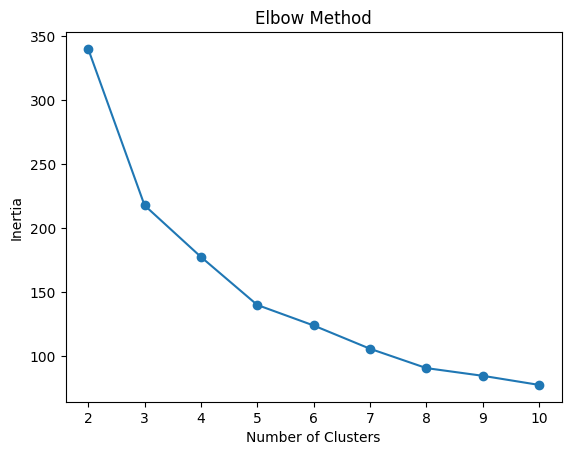

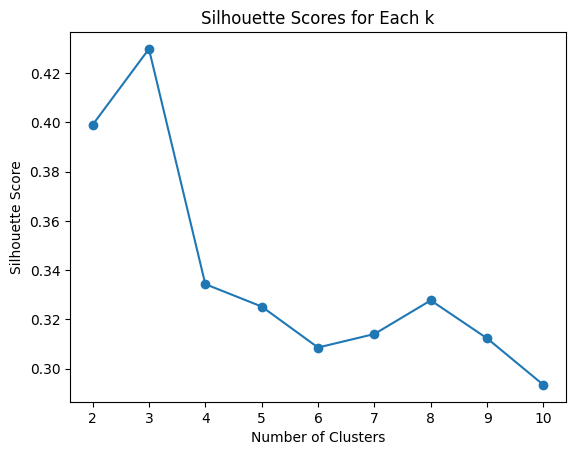

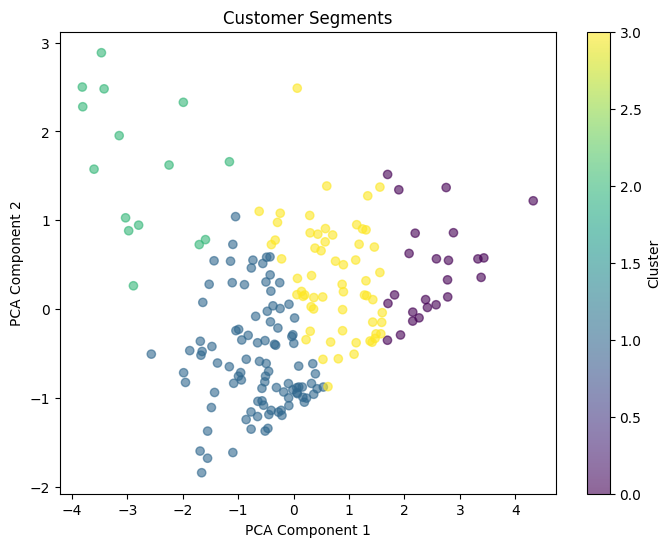

DB Index: 0.922792074986801
Silhouette Score: 0.33435361629882326


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Loading the data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merging the datasets on CustomerID
data = pd.merge(transactions, customers, on="CustomerID")

# Feature Engineering
customer_data = data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'max'
}).reset_index()

# Calculating recency (days since last transaction)
customer_data['Recency'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['TransactionDate'])).dt.days

# Selecting features for clustering
X = customer_data[['TotalValue', 'Quantity', 'Recency']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing number of clusters
inertia = []
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Ploting Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Ploting Silhouette Scores
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Scores for Each k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])

# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]

# Ploting clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['PCA1'], customer_data['PCA2'], c=customer_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Printing Clustering Metrics
print("DB Index:", db_index)
print("Silhouette Score:", silhouette_score(X_scaled, customer_data['Cluster']))
